In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/okcupid-profiles")

print("Path to dataset files:", path)

Path to dataset files: /Users/ruru/.cache/kagglehub/datasets/andrewmvd/okcupid-profiles/versions/1


In [3]:
kaggle_data = pd.read_csv(path + '/okcupid_profiles.csv')

In [4]:
kaggle_data.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [5]:
kaggle_data.shape

(59946, 31)

In [6]:
kaggle_data.info()
# alot of nan values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [7]:
kaggle_data.head(20)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN
5,29,single,m,straight,average,mostly anything,socially,NaN,graduated from college/university,white,...,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,"books: to kill a mockingbird, lord of the ring...","like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,you're awesome.
6,32,single,f,straight,fit,strictly anything,socially,never,graduated from college/university,"white, other",...,life is about the little things. i love to lau...,digging up buried treasure,frolicking witty banter using my camera to ext...,i am the last unicorn,i like books. ones with pictures. reading them...,laughter amazing people in my life color curio...,synchronicity there is this whole other realm...,plotting to take over the world with my army o...,my typical friday night,NaN
7,31,single,f,straight,average,mostly anything,socially,never,graduated from college/university,white,...,NaN,"writing. meeting new people, spending time wit...","remembering people's birthdays, sending cards,...",i'm rather approachable (a byproduct of being ...,"i like: alphabetized lists, aquariums, autobio...","friends, family, notebook/pen, books, music, t...",things that amuse and inspire me,out and about or relaxing at home with a good ...,NaN,NaN
8,24,single,f,straight,NaN,strictly anything,socially,NaN,graduated from college/uni

In [8]:
kaggle_data.isna().sum()*100/kaggle_data.shape[0]
# offspring and diet are least mentioned by users

age             0.000000
status          0.000000
sex             0.000000
orientation     0.000000
body_type       8.834618
diet           40.694959
drinks          4.979482
drugs          23.487806
education      11.056618
ethnicity       9.475194
height          0.005005
income          0.000000
job            13.675641
last_online     0.000000
location        0.000000
offspring      59.321723
pets           33.231575
religion       33.740366
sign           18.443266
smokes          9.194942
speaks          0.083408
essay0          9.154906
essay1         12.631368
essay2         16.077803
essay3         19.143896
essay4         17.577486
essay5         18.099623
essay6         22.972342
essay7         20.770360
essay8         32.070530
essay9         21.023922
dtype: float64

In [9]:
kaggle_data.isna().any(axis=1).sum()*100/kaggle_data.shape[0]
# more than 92 % of data has somthing empty
# means filling these empty value is must

92.64838354519067

### Remove essay columns from data, this is just for analysis

In [10]:
small_data = kaggle_data.copy()
for i in range(10):
    small_data.drop(columns="essay"+str(i), inplace=True)

In [11]:
small_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [12]:
def sorted(arr):
    arr = ["NaN" if type(x) is float else x for x in arr]
    arr.sort()
    for i in range(len(arr)):
        print(f"{i+1}. {arr[i]}")

### Check what are the unique values in each of the fields
This will help up see their categorical nature or help us derive new fields

In [13]:
print("Status: ")
sorted(small_data["status"].unique())

print("\nSex:")
sorted(small_data["sex"].unique())

print("\nOrientation:")
sorted(small_data["orientation"].unique())

print("\nBody Type:")
sorted(small_data["body_type"].unique())

print("\nDiet:")
sorted(small_data["diet"].unique())

print("\nDrinks:")
sorted(small_data["drinks"].unique())

print("\nDrugs:")
sorted(small_data["drugs"].unique())

print("\nEducation:")
sorted(small_data["education"].unique())

print("\nEthnicity:")
sorted(small_data["ethnicity"].unique())

print("\nJob:")
sorted(small_data["job"].unique())

print("\nLocation:")
sorted(small_data["location"].unique())
# this special location has to be parsed differently
(small_data["location"] == "vancouver, british columbia, canada").sum()

print("\nOffspring:")
sorted(small_data["offspring"].unique())

print("\npets:")
sorted(small_data["pets"].unique())

print("\nReligion:")
sorted(small_data["religion"].unique())

print("\nsign:")
sorted(small_data["sign"].unique())

print("\nSmokes:")
sorted(small_data["smokes"].unique())


Status: 
1. available
2. married
3. seeing someone
4. single
5. unknown

Sex:
1. f
2. m

Orientation:
1. bisexual
2. gay
3. straight

Body Type:
1. NaN
2. a little extra
3. athletic
4. average
5. curvy
6. fit
7. full figured
8. jacked
9. overweight
10. rather not say
11. skinny
12. thin
13. used up

Diet:
1. NaN
2. anything
3. halal
4. kosher
5. mostly anything
6. mostly halal
7. mostly kosher
8. mostly other
9. mostly vegan
10. mostly vegetarian
11. other
12. strictly anything
13. strictly halal
14. strictly kosher
15. strictly other
16. strictly vegan
17. strictly vegetarian
18. vegan
19. vegetarian

Drinks:
1. NaN
2. desperately
3. not at all
4. often
5. rarely
6. socially
7. very often

Drugs:
1. NaN
2. never
3. often
4. sometimes

Education:
1. NaN
2. college/university
3. dropped out of college/university
4. dropped out of high school
5. dropped out of law school
6. dropped out of masters program
7. dropped out of med school
8. dropped out of ph.d program
9. dropped out of space 

In [14]:
small_data.nunique()

age               54
status             5
sex                2
orientation        3
body_type         12
diet              18
drinks             6
drugs              3
education         32
ethnicity        217
height            60
income            13
job               21
last_online    30123
location         199
offspring         15
pets              15
religion          45
sign              48
smokes             5
speaks          7647
dtype: int64

## Data transform
* status *DONE*
    * normal types
* sex *DONE*
    * normal types
* orientation *DONE*
    * normal types
* body_type *DONE*
    * fix nan, median or "Not specified" or rather-not-say
* diet *DONE*
    * Split into two fields diet_prefrences ["halal", "kosher", "vegan", "vegetarian", "other"] and seriourness ["mostly", "strickly"]
    * fix nan, median or "Not specified"
* drinks
    * fix nan, median or "Not specified"
* drugs
    * fix nan, median or "Not specified"
* education *DONE*
    * split into fields education_status ["dropped out", "graduated" and "working"] and education_type
    * fix nan, median or "Not specified"
* ethnicity *DONE*
    * split in multiple columns for csv (boolean)
    * fix nan, median or False for all columns
* job
    * fix nan, median or "Not specified" or rather-not-say
* location *DONE*
    * split into city and state
* offspring *DONE*
    * split into, number_of_kids [Zero, One, TwoOrMore, Not specified] and want_more_kids [No, Yes, Maybe, Not specified]
    * hande Nan with "Not specified"
* pets *DONE*
    * split into has_cat(-> like_cats=True), has_dog(-> like_dogs=True), like_cats, like_dogs
    * fill Nan with Not specified
* religion *DONE*
    * split into religion_type and religion_seriousness [laughing, not_much, somewhat, very, Not specified]
    * fix nan, median or "Not specified" in both
* sign *DONE*
    * sign_name
    * sign_matters [Not specified, Alot, Not, For_fun]
    * fix nan, median or "Not specified" in both
* speaks
    * split into fields [speaks_{language}], value can be[fluently, okay, poorly, not]
    * fix nan, median or "Not specified" in both
* smokes
    * fix nan, median or "Not specified"
* essay{i} *DONE*
    * split into [has_essay{i}] (boolean) and [essay{i}_length]

### Splitting first

In [15]:
df_new = kaggle_data.copy()

In [16]:
def split_ethnicity(data):
    t = data.copy()
    cols = {}
    nanindex = []
    for e in t["ethnicity"].unique():
        if type(e) is not float:
            for et in e.split(", "):
                if et not in cols.keys():
                    cols[et] = []

    for e in t["ethnicity"]:
        if isinstance(e, float):
            e=""
        trues = e.split(", ")
        for k in cols.keys():
            val = 0
            if k in trues:
                val = 1
            cols[k].append(val)

    for k in cols.keys():
        tk = "is_" + k.replace(" ", "-")
        t[tk] = cols[k]
    return t


def split_location(data):
    t = data.copy()
    city = []
    state = []
    for e in t["location"]:
        sp = e.split(", ")
        if len(sp) == 3:
            city.append(sp[0])
            state.append(sp[2])
        else:
            city.append(sp[0])
            state.append(sp[1])
    t["city"] = city
    t["state"] = state
    return t


def split_offspring(data):
    t = data.copy()
    not_mentioned = "Not_mentioned"
    no_of_kids = []
    want_more_kids = []
    nofk_map = {"doesn't have kids": "Zero", "has a kid": "One", "has kids": "More_than_one"}
    wmk_map = {"and doesn't want any": "No", "doesn't want kids": "No", "but doesn't want more": "No",
               "but might want them": "Maybe", "and might want more": "Maybe", "might want kids": "Maybe",
               "but wants them": "Yes", "and wants more": "Yes", "wants kids": "Yes"}
    for e in t["offspring"]:
        if isinstance(e, float):
            no_of_kids.append(not_mentioned)
            want_more_kids.append(not_mentioned)
            continue
        sp = e.split(", ")
        if len(sp) == 2:
            no_of_kids.append(nofk_map[sp[0]])
            want_more_kids.append(wmk_map[sp[1]])
        else:
            if e in nofk_map.keys():
                no_of_kids.append(nofk_map[e])
                want_more_kids.append(not_mentioned)
            else:
                no_of_kids.append(not_mentioned)
                want_more_kids.append(wmk_map[e])
    t["no_of_kids"] = no_of_kids
    t["want_more_kids"] = want_more_kids
    return t


# In case of pet = [dogs, cats] folowing missing value can be derived
# has_pet = Yes -> like_pet = Yes
# has_pet = No -> like_pet = Not_mentiond
# like_pet = Yes -> has_pet = Not_mentiond
# like_pet = No -> has_pet = No
# pet not mentioned, then both value for that pet me Not_mentiond
def split_pets(data: pd.DataFrame):
    t = data.copy()
    nm = "Not_mentiond"
    pet_map = {"dislikes cats": ("No", "No"), "dislikes dogs": ("No", "No"),
               "likes cats": ("Not_mentiond", "Yes"), "likes dogs": ("Not_mentiond", "Yes"),
               "has cats": ("Yes", "Yes"), "has dogs": ("Yes", "Yes")}
    has_dogs = []
    has_cats = []
    like_dogs = []
    like_cats = []
    for e in t["pets"]:
        d_done = False
        c_done = False
        if not isinstance(e, float):
            for es in e.split(" and "):
                if es.find("cats") >= 0:
                    c_done = True
                    has_cats.append(pet_map[es][0])
                    like_cats.append(pet_map[es][1])
                else:
                    d_done = True
                    has_dogs.append(pet_map[es][0])
                    like_dogs.append(pet_map[es][1])

        if not c_done:
            has_cats.append(nm)
            like_cats.append(nm)
        if not d_done:
                has_dogs.append(nm)
                like_dogs.append(nm)
    t["has_dogs"] = has_dogs
    t["has_cats"] = has_cats
    t["like_dogs"] = like_dogs
    t["like_cats"] = like_cats
    return t


def split_religion(data: pd.DataFrame):
    t = data.copy()
    nm = "Not_mentiond"
    seriouness_map = {"laughing about it": "laughing","not too serious about it": "not_much",
                      "somewhat serious about it": "somewhat", "very serious about it": "very"}
    religion_name = []
    religion_seriousness = []
    for e in t["religion"]:
        if isinstance(e, float):
            religion_name.append(nm)
            religion_seriousness.append(nm)
            continue
        sp = re.split(" and | but ", e)
        if len(sp) == 1:
            religion_name.append(e)
            religion_seriousness.append(nm)
        else:
            religion_name.append(sp[0])
            religion_seriousness.append(seriouness_map[sp[1]])
    t["religion_name"] = religion_name
    t["religion_seriousness"] = religion_seriousness
    return t

def split_sign(data: pd.DataFrame):
    t = data.copy()
    nm = "Not_mentiond"
    seriouness_map = {"it doesn&rsquo;t matter": "no","it&rsquo;s fun to think about": "for_fun",
                      "it matters a lot": "very"}
    sign_name = []
    sign_seriousness = []
    for e in t["sign"]:
        if isinstance(e, float):
            sign_name.append(nm)
            sign_seriousness.append(nm)
            continue
        sp = re.split(" and | but ", e)
        if len(sp) == 1:
            sign_name.append(e)
            sign_seriousness.append(nm)
        else:
            sign_name.append(sp[0])
            sign_seriousness.append(seriouness_map[sp[1]])
    t["sign_name"] = sign_name
    t["sign_seriousness"] = sign_seriousness
    return t


def fix_essays(data: pd.DataFrame):
    t = data.copy()
    nm = "Not_mentiond"
    essay_length = {}
    for i in range(10):
        k = f"essay{i}"
        essay_length[f"{k}_length"] = []
        for e in data[k]:
            if isinstance(e, float):
                e = ""
            length = len(re.findall(r"\w+", e))
            essay_length[f"{k}_length"].append(length)
    for k in essay_length.keys():
        t[k] = essay_length[k]
    return t

# diet_type = other will remain same
# nan values mean both are not mentined
# diet_seriouness if not mentioned (with diet_type present) should be considered "Not_mentioned"
def split_diet(data):
    t = data.copy()
    nm = "Not_mentiond"
    diet_type = []
    diet_seriousness = []
    for e in t["diet"]:
        if isinstance(e, float):
            diet_type.append(nm)
            diet_seriousness.append(nm)
            continue
        sp = e.split(" ")
        if len(sp) == 1:
            diet_type.append(e)
            diet_seriousness.append(nm)
        else:
            diet_type.append(sp[1])
            diet_seriousness.append(sp[0])
    t["diet_type"] = diet_type
    t["diet_seriousness"] = diet_seriousness
    return t

# In case of nan both are Not_mentioned
# If education_type is defined and education_status not mentined, it should be considered
def split_education(data):
    t = data.copy()
    nm = "Not_mentiond"
    education_type = []
    education_status = []
    for e in t["education"]:
        if isinstance(e, float):
            education_type.append(nm)
            education_status.append(nm)
            continue
        sp = re.split(" of | from | on ", e)
        if len(sp) == 1:
            education_type.append(e)
            education_status.append("working")
        else:
            education_type.append(sp[1])
            education_status.append(sp[0].replace(" ", "_"))
    t["education_type"] = education_type
    t["education_status"] = education_status
    return t

# if fluency is not provided assume fluent
# the languages that are not mentioned should have "none" as fluency
def split_speaks(data: pd.DataFrame):
    t = data.copy()
    fluency_map = {"fluently": "fluent", "poorly": "poor", "okay": "okay"}
    languages = {}
    for e in t["speaks"].unique():
        if not isinstance(e, float):
            for l in e.split(", "):
                k = l.split(" ")[0]
                if k not in languages.keys():
                    languages[k] = []

    for e in t["speaks"]:
        lang_map = {}
        blank_val = "none"
        if not isinstance(e, float):
            for f in e.split(", "):
                sp2 = f.split(" (")
                lang = sp2[0]
                fluency = "fluent"
                if len(sp2) == 2:
                    fluency = fluency_map[sp2[1][0:-1]]
                lang_map[lang] = fluency

        for k in languages.keys():
            if k in lang_map.keys():
                languages[k].append(lang_map[k])
            else:
                languages[k].append(blank_val)

    for k in languages.keys():
        t[k] = languages[k]
    return t

In [17]:
df_new = split_ethnicity(df_new)
df_new = split_location(df_new)
df_new = split_offspring(df_new)
df_new = split_pets(df_new)
df_new = split_religion(df_new)
df_new = split_sign(df_new)
df_new = fix_essays(df_new)
df_new = split_diet(df_new)
df_new = split_education(df_new)
df_new = split_speaks(df_new)

In [18]:
df_new.head(20)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,maori,frisian,chechen,slovenian,basque,mongolian,rotuman,slovak,armenian,sardinian
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,none,none,none,none,none,none,none,none,none,none
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,none,none,none,none,none,none,none,none,none,none
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,none,none,none,none,none,none,none,none,none,none
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,none,none,none,none,none,none,none,none,none,none
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,none,none,none,none,none,none,none,none,none,none
5,29,single,m,straight,average,mostly anything,socially,NaN,graduated from college/university,white,...,none,none,none,none,none,none,none,none,none,none
6,32,single,f,straight,fit,strictly anything,socially,never,graduated from college/university,"white, other",...,none,none,none,none,none,none,none,none,none,none
7,31,single,f,straight,average,mostly anything,socially,never,graduated from college/university,white,...,none,none,none,none,none,none,none,none,none,none
8,24,single,f,straight,NaN,strictly anything,socially,NaN,graduated from college/university,white,...,none,none,none,none,none,none,none,none,none,none
9,37,single,m,straight,athletic,mostly anything,not at all,never,working on two-year college,white,...,none,none,none,none,none,none,none,none,none,none


In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Columns: 142 entries, age to sardinian
dtypes: float64(1), int64(21), object(120)
memory usage: 64.9+ MB




#### Remove columns that we just split


In [20]:
df_new = df_new.drop(columns=["last_online", "diet", "education", "ethnicity", "location", "offspring", "pets", "religion", "sign", "speaks", "essay0", "essay1", "essay2", "essay3", "essay4", "essay5", "essay6", "essay7", "essay8", "essay9"])

In [21]:
nullseries = df_new.isna().sum()
print(nullseries[nullseries > 0])

body_type     5296
drinks        2985
drugs        14080
height           3
job           8198
smokes        5512
dtype: int64


#### Replace nan values

In [22]:
def replace_with_not_specified(data, column):
    t = data.copy()
    t[column].replace(float('nan'), "Not_mentiond", inplace=True)
    return t

In [23]:
df_new = replace_with_not_specified(df_new, "body_type")
df_new = replace_with_not_specified(df_new, "drinks")
df_new = replace_with_not_specified(df_new, "drugs")
df_new = replace_with_not_specified(df_new, "job")
df_new = replace_with_not_specified(df_new, "smokes")

/var/folders/6n/4373_ztx537bqn6tpzy984140000gn/T/ipykernel_40116/985871306.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  t[column].replace(float('nan'), "Not_mentiond", inplace=True)


In [24]:
height_mean = df_new["height"].mean()
df_new = df_new.replace(float('nan'), height_mean)

In [25]:
df_new.isna().sum()[df_new.isna().sum() > 0]
# no nan value left

Series([], dtype: int64)

### List of fields : 122

#### Normal fields : 11
age, status, sex, orientation, body_type, drinks, drugs, height, income, job, smokes

#### ethnicity: 9
is_asian, is_white, is_black, is_other, is_hispanic-/-latin, is_pacific-islander, is_native-american, is_middle-eastern, is_indian

#### location: 2
city, state

#### offspring: 2
no_of_kids, want_more_kids

#### pets : 4
has_dogs, has_cats, like_dogs, like_cats

#### religion : 2
religion_name, religion_seriousness

#### sign : 2
sign_name, sign_seriousness

#### essay{i} : 10
essay0_length, essay1_length, essay2_length, essay3_length, essay4_length, essay5_length, essay6_length, essay7_length, essay8_length, essay9_length

#### diet : 2
diet_type, diet_seriousness

#### education : 2
education_type, education_status

#### speaks : 76
english, spanish, french, c++, german, chinese, italian, tagalog, japanese, other, thai, russian, dutch, lisp, indonesian, portuguese, swedish, belarusan, gujarati, farsi, hindi, sanskrit, afrikaans, khmer, hebrew, yiddish, polish, serbian, korean, persian, czech, croatian, bengali, vietnamese, esperanto, swahili, latin, norwegian, greek, ancient, albanian, icelandic, arabic, tibetan, cebuano, georgian, hawaiian, turkish, latvian, tamil, bulgarian, ukrainian, occitan, breton, catalan, urdu, danish, hungarian, irish, romanian, finnish, welsh, lithuanian, estonian, malay, ilongo, maori, frisian, chechen, slovenian, basque, mongolian, rotuman, slovak, armenian, sardinian

In [26]:
# check unique count of each field
line = []
uniq = df_new.nunique()
for k in uniq.keys():
    txt = f"{k}: {uniq[k]}"
    if len(line) < 5:
        line.append(txt)
    else:
        print("\t".join(line))
        line.clear()
        line.append(txt)

age: 54	status: 5	sex: 2	orientation: 3	body_type: 13
drinks: 7	drugs: 4	height: 61	income: 13	job: 22
smokes: 6	is_asian: 2	is_white: 2	is_black: 2	is_other: 2
is_hispanic-/-latin: 2	is_pacific-islander: 2	is_native-american: 2	is_middle-eastern: 2	is_indian: 2
city: 198	state: 41	no_of_kids: 4	want_more_kids: 4	has_dogs: 3
has_cats: 3	like_dogs: 3	like_cats: 3	religion_name: 10	religion_seriousness: 5
sign_name: 13	sign_seriousness: 4	essay0_length: 873	essay1_length: 457	essay2_length: 319
essay3_length: 244	essay4_length: 691	essay5_length: 300	essay6_length: 359	essay7_length: 215
essay8_length: 323	essay9_length: 440	diet_type: 7	diet_seriousness: 3	education_type: 9
education_status: 4	english: 4	spanish: 4	french: 4	c++: 4
german: 4	chinese: 4	italian: 4	tagalog: 4	japanese: 4
other: 4	thai: 4	russian: 4	dutch: 4	lisp: 4
indonesian: 4	portuguese: 4	swedish: 4	belarusan: 4	gujarati: 4
farsi: 4	hindi: 4	sanskrit: 4	afrikaans: 4	khmer: 4
hebrew: 4	yiddish: 4	polish: 4	serbian: 4	k

In [27]:
df_new.info

<bound method DataFrame.info of        age     status sex orientation       body_type      drinks  \
0       22     single   m    straight  a little extra    socially   
1       35     single   m    straight         average       often   
2       38  available   m    straight            thin    socially   
3       23     single   m    straight            thin    socially   
4       29     single   m    straight        athletic    socially   
...    ...        ...  ..         ...             ...         ...   
59941   59     single   f    straight    Not_mentiond    socially   
59942   24     single   m    straight             fit       often   
59943   42     single   m    straight         average  not at all   
59944   27     single   m    straight        athletic    socially   
59945   39     single   m         gay         average    socially   

              drugs  height  income                           job  ... maori  \
0             never    75.0      -1                transpor

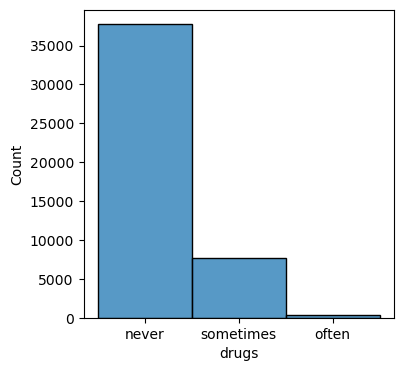

In [28]:
# Filter out "Not mentioned"
filtered_df = df_new[df_new["want_more_kids"].isin(["Maybe", "Yes", "No"])]
filtered_df = df_new[df_new["no_of_kids"].isin(["Zero", "One", "More_than_one"])]
filtered_df = df_new[df_new["education_status"].isin(["working", "graduated", "dropped_out"])]
filtered_df = df_new[df_new["has_dogs"].isin(["Yes", "No"])]
filtered_df = df_new[df_new["drinks"].isin(["socially", "rarely", "often", "not at all", "very often", "desperately"])]
filtered_df = df_new[df_new["drugs"].isin(["never", "sometimes", "often"])]

# Plot the histogram
plt.figure(figsize=(4,4))
sns.histplot(data=filtered_df["drugs"])
plt.show()

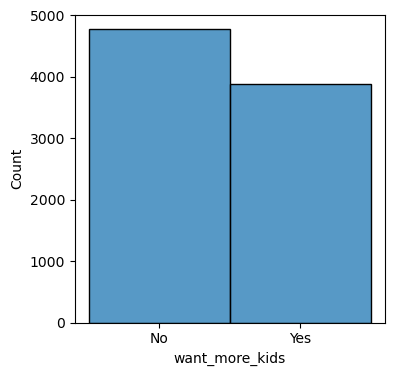

In [29]:
# Filter out "Not mentioned" and "Maybe"
filtered_df = df_new[df_new["want_more_kids"].isin(["Yes", "No"])]

# Plot the histogram
plt.figure(figsize=(4,4))
sns.histplot(data=filtered_df["want_more_kids"])
plt.show()

# Data transformation and representation

### Dropping Unwanted Columns

We want to drop the columns representing attributes we do not want to include for our dataset such as city, state, and essays. We exclude two variables on location 'city' and 'state' because the dataset we have is collected from OKCupid users arouns San Francisco region so the location variable is not likely to provide significant insights.

In [30]:
essay_len = [ 'essay0_length',
 'essay1_length',
 'essay2_length',
 'essay3_length',
 'essay4_length',
 'essay5_length',
 'essay6_length',
 'essay7_length',
 'essay8_length',
 'essay9_length',]
loc = ['city', 'state']

In [31]:
filtered_df.drop(columns=loc + essay_len, axis=1, inplace=True)

/var/folders/6n/4373_ztx537bqn6tpzy984140000gn/T/ipykernel_40116/3014063536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=loc + essay_len, axis=1, inplace=True)


Motivation: We have successfully cleaned the dataset, however, there remains work to be done before the data can be used for machine learning. We must encode categorical data and standardize numerical data so the ML algorithms understands the input.

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

### Continuous Variable Standardization

We have two major numerical variables. (Income is treated as categorical as it has few distinct values. We decide not to include essay length in our model.)

In [33]:
num_col = ['age', 'height']

Before we begin to encode and standardize data, we need to know what our data looks like:

In [34]:
filtered_df['age'].unique()

array([23, 31, 29, 28, 27, 20, 32, 35, 38, 21, 26, 33, 50, 59, 48, 25, 52,
       42, 22, 34, 36, 24, 47, 39, 63, 61, 40, 19, 30, 60, 44, 57, 41, 49,
       46, 37, 18, 43, 45, 51, 53, 58, 68, 66, 55, 69, 65, 67, 56, 54, 62,
       64])

We can plot a histogram to understand the distribution of the age values

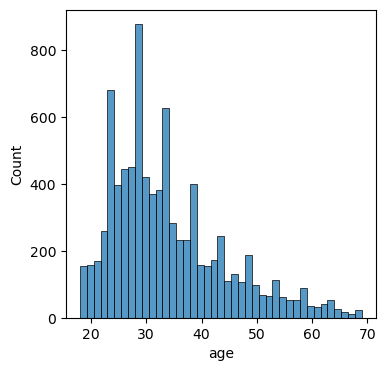

In [35]:
plt.figure(figsize=(4,4))
sns.histplot(data=filtered_df["age"])
plt.show()

We can see that there are 54 different values. And we have people age 109 and 110 using the online dating platform! Well, it is highly likely that these data are not true demographic information. Also, our research question concerns childbearing intentions, it does not make sense keep these entries with age 109 and 110. We want to drop them from the dataframe:

In [36]:
#filtered_df.drop(filtered_df[filtered_df['age'] > 100].index, inplace=True)

We use StandardScaler to standardize the values to have a mean of 0 and s.d. of 1


In [37]:
age_scaler = StandardScaler()
filtered_df['age'] = age_scaler.fit_transform(filtered_df[['age']].values)

/var/folders/6n/4373_ztx537bqn6tpzy984140000gn/T/ipykernel_40116/1337399837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age'] = age_scaler.fit_transform(filtered_df[['age']].values)


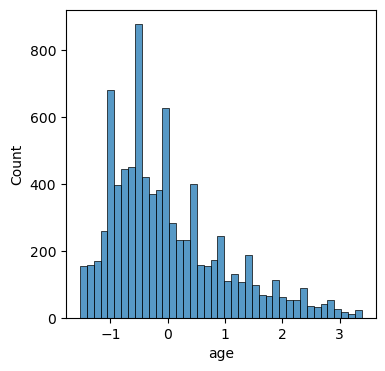

In [38]:
plt.figure(figsize=(4,4))
sns.histplot(data=filtered_df["age"])
plt.show()

In [39]:
# Alternative Option: Using Age Brackets?
# age_bins = list(range(15, 75, 5)) + [105, 110]
# labels = [f"[{age_bins[i]},{age_bins[i+1]})" for i in range(len(age_bins)-1)]
# df_new['age_bracket'] = pd.cut(df_new['age'], bins=age_bins, labels=labels, right=False)

Similarly, we process the 'height' attribute. First, we take a look at the unique values and distribution of the height attribute.

In [40]:
filtered_df['height'].unique()

array([71., 65., 62., 70., 72., 60., 69., 67., 63., 66., 73., 68., 64.,
       74., 61., 75., 79., 77., 76., 78., 59., 56., 58., 43., 52., 95.,
       55., 80., 83., 82., 53., 84., 81., 50., 49., 57., 36.])

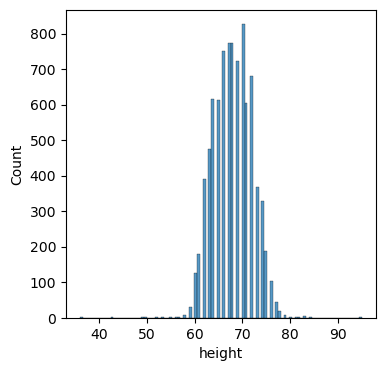

In [41]:
plt.figure(figsize=(4,4))
sns.histplot(data=filtered_df["height"])
plt.show()

We observe that there are some unique values(in inches) such as 8, 3, 9, 27, etc. that appear to be errors. We should set a reasonable bound and remove the outliers. Since we have observed from the age attribute that the youngest users are of age 18, we decide that it is reasonable to remove values below 55 inches in height.

In [42]:
filtered_df.drop(filtered_df[filtered_df['height'] < 55].index, inplace=True)

/var/folders/6n/4373_ztx537bqn6tpzy984140000gn/T/ipykernel_40116/434711381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(filtered_df[filtered_df['height'] < 55].index, inplace=True)


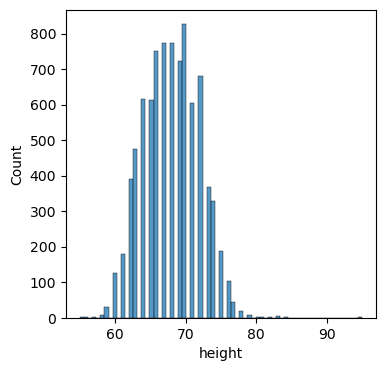

In [43]:
plt.figure(figsize=(4,4))
sns.histplot(data=filtered_df["height"])
plt.show()

We use StandardScaler to standardize the values to have a mean of 0 and s.d. of 1

In [44]:
height_scaler = StandardScaler()
filtered_df['height'] = height_scaler.fit_transform(filtered_df[['height']].values)

/var/folders/6n/4373_ztx537bqn6tpzy984140000gn/T/ipykernel_40116/969039334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['height'] = height_scaler.fit_transform(filtered_df[['height']].values)


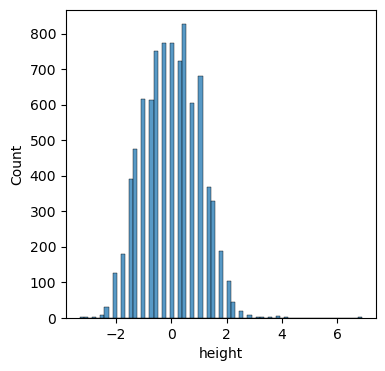

In [45]:
plt.figure(figsize=(4,4))
sns.histplot(data=filtered_df["height"])
plt.show()

To prevent errors from indexing, we want to reassign the index for each row.

In [46]:
filtered_df.reset_index(drop=True, inplace=True)

### Categorical Variable Encoding

#### One-hot Encoding

One-hot encoding represents categorical data as binary vectors of 1 and 0. It does not imply any ordinal relationship.

We identify the variables(listed in list object onehot) that should be encoded using one-hot encoding. Variables regarding identity are already encoded(listed in list object identity) so no further processing is needed.

In [47]:
onehot = ['status', 'sex', 'orientation', 'body_type', 'job',
          'diet_type', 'education_type', 'has_cats','has_dogs',
          'like_dogs', 'like_cats', 'religion_name', 'sign_name', 'education_status']
identity = ['is_asian', 'is_white', 'is_black', 'is_other', 'is_hispanic-/-latin',
            'is_pacific-islander', 'is_native-american', 'is_middle-eastern', 'is_indian']

We define the following function for one-hot encoding:

In [48]:
def one_hot_encode(df, lst):
    for attribute in lst:
        oh_enc = OneHotEncoder(handle_unknown='ignore')
        onehot_df = pd.DataFrame(oh_enc.fit_transform(df[[attribute]]).toarray().astype(int),
                                 columns=oh_enc.get_feature_names_out(),
                                 index=df.index)  # Ensure the index is preserved
        df = pd.concat([df.drop(attribute, axis=1), onehot_df], axis=1)  # Drop and concat in a single step
    return df

In [49]:
filtered_df = one_hot_encode(filtered_df, onehot)

In [50]:
len(filtered_df.columns)

196

In [51]:
print(filtered_df[:10])

        age        drinks         drugs    height  income         smokes  \
0 -1.048631      socially  Not_mentiond  0.769957   20000             no   
1 -0.276997      socially         never -0.758005      -1             no   
2 -0.469905      socially         never -1.521986   50000             no   
3 -0.566359        rarely         never  0.515296      -1             no   
4 -0.662814      socially         never  1.024617      -1             no   
5 -1.337993      socially         never -2.031307      -1             no   
6 -0.180543      socially         never  0.260636      -1  when drinking   
7  0.108820  Not_mentiond  Not_mentiond  1.024617      -1             no   
8  0.398183      socially         never -0.758005      -1             no   
9 -0.276997      socially  Not_mentiond  0.260636      -1      sometimes   

   is_asian  is_white  is_black  is_other  ...  sign_name_libra  \
0         0         1         0         0  ...                0   
1         0         1        

#### Ordinal Encoding

We process the following attributes listed using ordinal encoder as the attributes reflect frequency, fluency, seriousness, preference, etc.

In [52]:
ordinal = ['drugs', 'drinks', 'income', 'smokes', 'no_of_kids',
           'religion_seriousness', 'sign_seriousness', 'diet_seriousness',
           'english', 'spanish', 'french', 'c++', 'german', 'chinese', 'italian',
           'tagalog', 'japanese', 'other', 'thai', 'russian',
           'dutch', 'lisp', 'indonesian', 'portuguese', 'swedish',
           'belarusan', 'gujarati', 'farsi', 'hindi', 'sanskrit',
           'afrikaans', 'khmer', 'hebrew', 'yiddish', 'polish',
           'serbian', 'korean', 'persian', 'czech', 'croatian',
           'bengali', 'vietnamese', 'esperanto', 'swahili', 'latin',
           'norwegian', 'greek', 'ancient', 'albanian', 'icelandic',
           'arabic', 'tibetan', 'cebuano', 'georgian', 'hawaiian',
           'turkish', 'latvian', 'tamil', 'bulgarian', 'ukrainian',
           'occitan', 'breton', 'catalan', 'urdu', 'danish',
           'hungarian', 'irish', 'romanian', 'finnish',
           'welsh', 'lithuanian', 'estonian', 'malay', 'ilongo',
           'maori', 'frisian', 'chechen', 'slovenian', 'basque',
           'mongolian', 'rotuman', 'slovak', 'armenian', 'sardinian']


In [53]:
fluency_ordinal_enc = OrdinalEncoder(categories=[['none', 'poor', 'okay', 'fluent']])
drinks_ordinal_enc = OrdinalEncoder(categories=[['Not_mentiond', 'not at all', 'desperately', 'rarely', 'socially', 'often', 'very often']])
drugs_ordinal_enc = OrdinalEncoder(categories=[['Not_mentiond', 'never', 'sometimes', 'often']])
smokes_ordinal_enc = OrdinalEncoder(categories=[['Not_mentiond', 'no', 'trying to quit', 'when drinking', 'sometimes', 'yes']])
sign_ordinal_enc = OrdinalEncoder(categories=[['Not_mentiond', 'no', 'for_fun', 'very']])
diet_ordinal_enc = OrdinalEncoder(categories=[['Not_mentiond', 'strictly', 'mostly']])
religion_ordinal_enc = OrdinalEncoder(categories=[['Not_mentiond', 'not_much', 'laughing', 'somewhat', 'very']])
income_enc = OrdinalEncoder(categories=[[     -1,  20000, 30000,   40000,  50000,   60000, 70000, 80000,
        100000, 150000, 250000, 500000, 1000000,]])
no_of_kids_enc = OrdinalEncoder(categories=[['Not_mentioned', 'Zero', 'One', 'More_than_one']])

In [54]:
enc_dict = {'drugs': drugs_ordinal_enc, 'drinks': drinks_ordinal_enc, 'income':income_enc,
            'smokes':smokes_ordinal_enc, 'no_of_kids': no_of_kids_enc,
            'religion_seriousness': religion_ordinal_enc, 'sign_seriousness': sign_ordinal_enc,
            'diet_seriousness': diet_ordinal_enc}

In [55]:
def ordinal_encode(df, ordinal, enc_dict):
    for attribute in ordinal:

        if attribute not in enc_dict:
            df[attribute] = fluency_ordinal_enc.fit_transform(df[[attribute]])
            continue

        df[attribute] = enc_dict[attribute].fit_transform(df[[attribute]])

    return df

In [56]:
filtered_df = ordinal_encode(filtered_df, ordinal, enc_dict)

In [57]:
len(filtered_df.columns)

196

In [58]:
filtered_df.shape

(8651, 196)

#### Grouping Features

Motivation: we want to identify features belonging to defferent broader categories such as demographics, socio-economic status, etc. From there, we can create trimmed datasets that could analyze the impact of the removal of a specific category of features on our model. In addition, we observe that there are a lot of language features which could be combined to produce one single feature describing individual users' language proficiency and capacity.

**Generating Language Skill Feature**

First, we identify a list of language feature names. Note we excluded c++ from our language list because it is a programming language which tends to have strong positive correlation with income.

In [59]:
language = ['english', 'spanish', 'french', 'german', 'chinese', 'italian',
           'tagalog', 'japanese', 'other', 'thai', 'russian',
           'dutch', 'lisp', 'indonesian', 'portuguese', 'swedish',
           'belarusan', 'gujarati', 'farsi', 'hindi', 'sanskrit',
           'afrikaans', 'khmer', 'hebrew', 'yiddish', 'polish',
           'serbian', 'korean', 'persian', 'czech', 'croatian',
           'bengali', 'vietnamese', 'esperanto', 'swahili', 'latin',
           'norwegian', 'greek', 'ancient', 'albanian', 'icelandic',
           'arabic', 'tibetan', 'cebuano', 'georgian', 'hawaiian',
           'turkish', 'latvian', 'tamil', 'bulgarian', 'ukrainian',
           'occitan', 'breton', 'catalan', 'urdu', 'danish',
           'hungarian', 'irish', 'romanian', 'finnish',
           'welsh', 'lithuanian', 'estonian', 'malay', 'ilongo',
           'maori', 'frisian', 'chechen', 'slovenian', 'basque',
           'mongolian', 'rotuman', 'slovak', 'armenian', 'sardinian']

We originally considered calculating the average fluency score for each individual based on the sum  of the score divided by the number of languages they indicate speaking. However, we realized that this method would assign an individual who speaks three languages(one fluent, two poor) a lower score than an individual who only speaks one language and speaks it fluently. Eventually, we decided that we should use the sum of the scores divided by number of all possible languages we consider which is the length of the language list.

<Axes: ylabel='Count'>

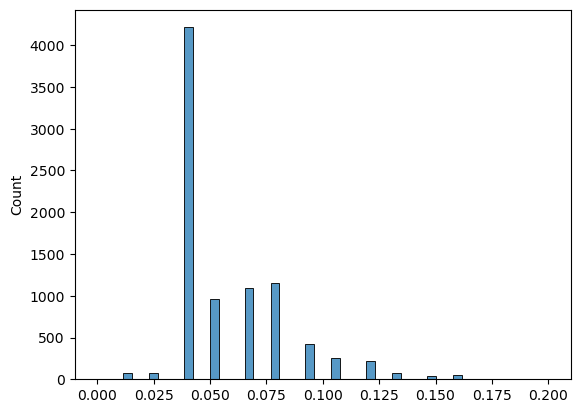

In [60]:
language_score = filtered_df[language].sum(axis = 1) / len(language)
sns.histplot(language_score)

In [61]:
filtered_df['language_score'] = language_score

**Grouping Features for Future Use**

In [62]:
sign_attr = ["sign_name_Not_mentiond", "sign_name_aquarius", "sign_name_aries", "sign_name_cancer", "sign_name_capricorn", "sign_name_gemini",
             "sign_name_leo", "sign_name_libra", "sign_name_pisces", "sign_name_sagittarius", "sign_name_scorpio", "sign_name_taurus",
             "sign_name_virgo"]
life_style_attr = {"drinks": ["drinks"],
                   "drugs": ["drugs"],
                   "smokes": ["smokes"],
                   "sign_seriousness": ["sign_seriousness"],
                   "diet_seriousness": ["diet_seriousness"],
                   "diet": ["diet_type_Not_mentiond", "diet_type_anything", "diet_type_halal",
                   "diet_type_kosher", "diet_type_other", "diet_type_vegan", "diet_type_vegetarian"],
                   "pet": ["has_cats_No", "has_cats_Not_mentiond", "has_cats_Yes", "has_dogs_No", "has_dogs_Not_mentiond", "has_dogs_Yes", "like_dogs_No", "like_dogs_Not_mentiond",
                   "like_dogs_Yes", "like_cats_No", "like_cats_Not_mentiond", "like_cats_Yes"]}
physical_attr = {"age": ["age"],
                 "height": ["height"],
                 "body_type": ["body_type_Not_mentiond", "body_type_a little extra", "body_type_athletic", "body_type_average",
                               "body_type_curvy", "body_type_fit", "body_type_full figured", "body_type_jacked", "body_type_overweight",
                               "body_type_rather not say", "body_type_skinny", "body_type_thin", "body_type_used up"]}
demo_attr = {"sex": ["sex_f", "sex_m"],
             "ethnicity": ["is_asian", "is_white", "is_black", "is_other", "is_hispanic-/-latin", "is_pacific-islander",
                           "is_native-american", "is_middle-eastern", "is_indian"],
             "language_overall": ["language_score"],
             "language": language,
             "orientation": ["orientation_bisexual", "orientation_gay", "orientation_straight"],
             "religion_seriousness": ["religion_seriousness"],
             "religion": ['religion_name_agnosticism', 'religion_name_atheism', 'religion_name_christianity',
                          'religion_name_judaism', 'religion_name_catholicism', 'religion_name_islam',
                          'religion_name_hinduism', 'religion_name_buddhism', 'religion_name_other']}
socioecno_attr = {"economic": ["income"],
                  "job": ["job_Not_mentiond", "job_artistic / musical / writer", "job_banking / financial / real estate",
                          "job_clerical / administrative", "job_education / academia", "job_entertainment / media", "job_executive / management",
                          "job_hospitality / travel", "job_law / legal services", "job_medicine / health", "job_military",
                          "job_computer / hardware / software", "job_construction / craftsmanship", "job_science / tech / engineering", "job_student",
                          "job_other", "job_political / government", "job_rather not say", "job_retired", "job_sales / marketing / biz dev",
                          "job_transportation", "job_unemployed"],
                  "roman_status": ["status_available", "status_married", "status_seeing someone", "status_single", "status_unknown"],
                  "education_type": ["education_type_Not_mentiond", "education_type_college/university", "education_type_high school",
                                "education_type_law school", "education_type_masters program", "education_type_med school",
                                "education_type_ph.d program", "education_type_space camp", "education_type_two-year college"],
                  "education_status": ["education_status_Not_mentiond", "education_status_dropped_out", "education_status_graduated",
                                       "education_status_working"],
                  "skill": ["c++"]}
child_attr = ["no_of_kids"]


# Data Modeling

In [63]:
# packages for machine learning
import sklearn
import itertools
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.metrics import f1_score

# packages for plot and visualization
import matplotlib.pyplot as plt
from matplotlib import pylab
import graphviz
pylab.rcParams["figure.figsize"] = (5.0, 4.0)
%matplotlib inline

# packages for model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

Before modeling, we want to split the data into training data and testing data. Since we are asking about distinguishing childbearing intentions, we want to work with a training dataset in which the 'want_more_kids' attribute is one of the following binary answers: ['No', 'Yes']. Hence, we use filtered_df. This is a classification task.

In [64]:
y = filtered_df["want_more_kids"]
X = filtered_df.drop("want_more_kids", axis = 1)
X.shape, y.shape

((8651, 196), (8651,))

After filtering, we have 8651 data entries. This is sufficient for us to carry on with modeling and analysis.

We want to keep a portion(30%) of the data for testing.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((6055, 196), (2596, 196))

In [66]:
dt_feature_names = list(X.columns)

### Decision Tree Classifier


#### Basic Model

To start off, we want to see what a basic decision tree classifier with out many specified parameters is like for our data.

In [67]:
dt_clf = DecisionTreeClassifier(random_state=42,criterion='entropy')

In [68]:
dt_clf = dt_clf.fit(X_train, y_train)

In [69]:
np.round(dt_clf.score(X_test,y_test),3)

0.808

We have a score of 0.808. This seems nice. However, we keep in mind that the .score() function for decision tree classifier outputs the accuracy score, which is only part of the scores we can and should look up when evaluating model performance.

Before we move on to explore model performance further, we want to take a peek at the current decision tree graph we have:

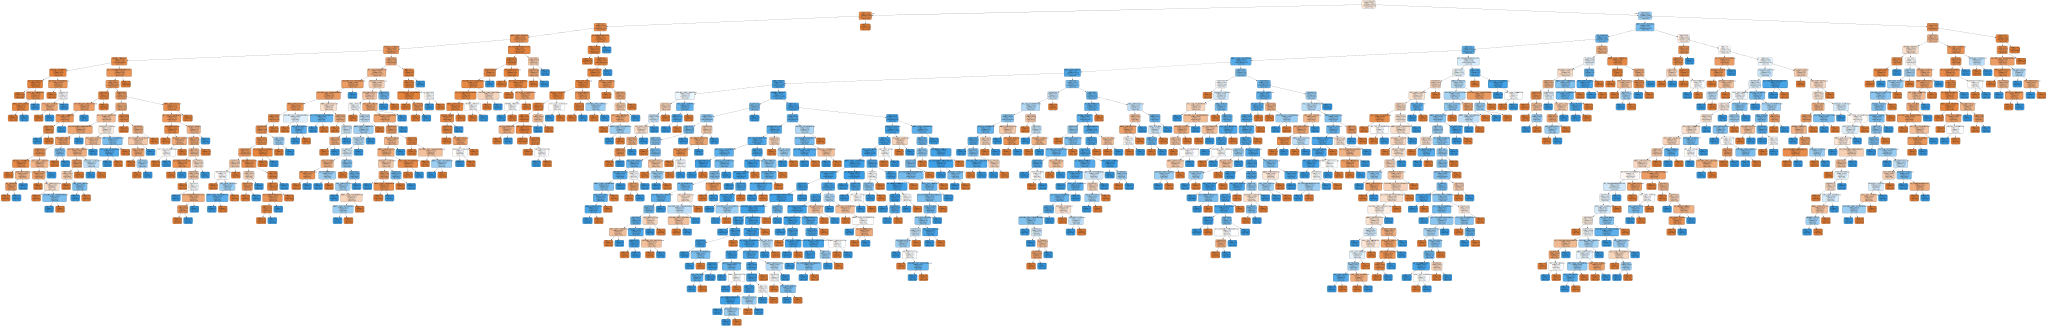

In [70]:
dot_data = tree.export_graphviz(dt_clf, out_file=None,
                                feature_names=dt_feature_names,
                                class_names=["Yes", "No"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

Apparently, we have a large graph! Pruning is necessary.

We should also take a look at the feature importances.

In [71]:
pd.DataFrame([np.round(dt_clf.feature_importances_,2)], columns=dt_feature_names)

,age,drinks,drugs,height,income,smokes,is_asian,is_white,is_black,is_other,...,sign_name_pisces,sign_name_sagittarius,sign_name_scorpio,sign_name_taurus,sign_name_virgo,education_status_Not_mentiond,education_status_dropped_out,education_status_graduated,education_status_working,language_score
0,0.18,0.02,0.03,0.03,0.02,0.01,0.0,0.01,0.0,0.0,...,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.01,0.02


Some outputs are hidden, let's extract the important(non-zero) feature names:

In [72]:
filter = (np.round(dt_clf.feature_importances_,2) > 0)
X_train.loc[:, filter].columns

Index(['age', 'drinks', 'drugs', 'height', 'income', 'smokes', 'is_white',
       'no_of_kids', 'religion_seriousness', 'sign_seriousness',
       'diet_seriousness', 'spanish', 'status_single', 'sex_f',
       'orientation_straight', 'body_type_average',
       'job_sales / marketing / biz dev', 'diet_type_anything',
       'education_type_college/university', 'has_cats_Not_mentiond',
       'like_dogs_Not_mentiond', 'like_cats_Not_mentiond',
       'religion_name_agnosticism', 'religion_name_atheism',
       'religion_name_other', 'sign_name_taurus', 'education_status_working',
       'language_score'],
      dtype='object')

We can view the confusion matrix for this basic model using the following codes:

In [73]:
y_pred = dt_clf.predict(X_test)
confusion_matrix(y_test, y_pred,labels=['No','Yes'])

array([[1197,  251],
       [ 247,  901]])

The true negative, false positive, false negative, true positive values are:

In [74]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred,labels=['No','Yes']).ravel()
tn, fp, fn, tp

(1197, 251, 247, 901)

We can print out the classification report which includes accuracy, precision, f1, and recall scores:

In [75]:
print(classification_report(y_test, y_pred, zero_division=np.nan))

              precision    recall  f1-score   support

          No       0.83      0.83      0.83      1448
         Yes       0.78      0.78      0.78      1148

    accuracy                           0.81      2596
   macro avg       0.81      0.81      0.81      2596
weighted avg       0.81      0.81      0.81      2596



#### Experimenting with Different Input Features

Motivation: In this section, we test the effect of droping different groups of attributes on the performance of the basic model. We want to find which group of attributes has a stronger effect on model performance by observing changes in scores on the classification report. According to our hypothesis and list of important features from the basic model, we expect dropping attributes such as language, body type, and sign to have limited impact on model performance.

From the basic model, we have a list of features whose feature importance is greater than 0:
['age', 'drinks', 'drugs', 'height', 'income', 'smokes', 'is_white',
       'no_of_kids', 'religion_seriousness', 'sign_seriousness',
       'diet_seriousness', 'spanish', 'status_single', 'sex_f',
       'orientation_straight', 'body_type_average',
       'job_sales / marketing / biz dev', 'diet_type_anything',
       'education_type_college/university', 'has_cats_Not_mentiond',
       'like_dogs_Not_mentiond', 'like_cats_Not_mentiond',
       'religion_name_agnosticism', 'religion_name_atheism',
       'religion_name_other', 'sign_name_taurus', 'education_status_working',
       'language_score']

From the above information, we have a picture of what attributes are significant. However, the significance may be a result of chance. Hence, we want to explore a bit more. If dropping a group of attributes have limited impact on model performance, we drop the group of attributes even if member(s) of the group appears in the important features list for the basic model as attributes in the same group are equivalent(separated as a result of one-hot encoding).

**Sign**:
We start with removing the sign attributes(sign_name_libra, sign_name_virgo, etc.). Note the sign seriousness is not removed together with sign attribute as it signals belief rather than demographic information.

In [76]:
y = filtered_df["want_more_kids"]
X = filtered_df.drop(["want_more_kids"] + sign_attr, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((6055, 183), (2596, 183))

In [77]:
dt_clf = DecisionTreeClassifier(random_state = 42, criterion='gini')
dt_clf = dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels=['No','Yes']))
print(classification_report(y_test, y_pred, zero_division=np.nan))

[[1172  276]
 [ 235  913]]
              precision    recall  f1-score   support

          No       0.83      0.81      0.82      1448
         Yes       0.77      0.80      0.78      1148

    accuracy                           0.80      2596
   macro avg       0.80      0.80      0.80      2596
weighted avg       0.80      0.80      0.80      2596



We observe that the removal of sign attributes seems to have limited impact on the overall performance of the model. We have minor decreases(0.01) in average scores for precision, recall, f1, and accuracy. However, since the scores are rounded to two decimal places, this difference seems insignificant and is likely a result of mere chance. What we observe here is consistent with our belief that sign attributes only signals the time of birth and bears no other meaning.

**Body Type**: Self-reported body type seems to have limited correlation with individuals' childbearing intentions. Let's check whether it is truly the case.

In [78]:
y = filtered_df["want_more_kids"]
X = filtered_df.drop(["want_more_kids"] + physical_attr['body_type'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((6055, 183), (2596, 183))

In [79]:
dt_clf = DecisionTreeClassifier(random_state = 42, criterion='gini')
dt_clf = dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels=['No','Yes']))
print(classification_report(y_test, y_pred, zero_division=np.nan))

[[1175  273]
 [ 235  913]]
              precision    recall  f1-score   support

          No       0.83      0.81      0.82      1448
         Yes       0.77      0.80      0.78      1148

    accuracy                           0.80      2596
   macro avg       0.80      0.80      0.80      2596
weighted avg       0.81      0.80      0.80      2596



Similar to the result from dropping sign attributes, we observe limited impact to our model from dropping the physical attribute body type. Hence, we argue that the change in scores from dropping body type attributes is a result of chance. Hence, we should drop these attributes from our model.

**Language**: We want to exclude the languages from our model as there are too many and some of them are extremely imbalanced. We have another attribute we defined in data transformation's grouping features section for average language fluency which we believe to have summarized and captured users' self-reported language proficiency. Let's see the effect of dropping languages from our model.

In [80]:
y = filtered_df["want_more_kids"]
X = filtered_df.drop(["want_more_kids"] + language, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_clf = DecisionTreeClassifier(random_state = 42, criterion='gini')
dt_clf = dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels=['No','Yes']))
print(classification_report(y_test, y_pred, zero_division=np.nan))

[[1160  288]
 [ 216  932]]
              precision    recall  f1-score   support

          No       0.84      0.80      0.82      1448
         Yes       0.76      0.81      0.79      1148

    accuracy                           0.81      2596
   macro avg       0.80      0.81      0.80      2596
weighted avg       0.81      0.81      0.81      2596



The scores vary more compared to dropping signs or body types. The average score does not change significantly. We conclude that dropping language attributes do not undermine our model performance.

**Age**:

In [81]:
y = filtered_df["want_more_kids"]
X = filtered_df.drop(["want_more_kids"] + physical_attr["age"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_clf = DecisionTreeClassifier(random_state = 42, criterion='gini')
dt_clf = dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels=['No','Yes']))
print(classification_report(y_test, y_pred, zero_division=np.nan))

[[1171  277]
 [ 282  866]]
              precision    recall  f1-score   support

          No       0.81      0.81      0.81      1448
         Yes       0.76      0.75      0.76      1148

    accuracy                           0.78      2596
   macro avg       0.78      0.78      0.78      2596
weighted avg       0.78      0.78      0.78      2596



We observe a significant change in scores. Age is an attribute that has a significant impact on our model performance.

**Height**:

In [82]:
y = filtered_df["want_more_kids"]
X = filtered_df.drop(["want_more_kids"] + physical_attr["height"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_clf = DecisionTreeClassifier(random_state = 42, criterion='gini')
dt_clf = dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels=['No','Yes']))
print(classification_report(y_test, y_pred, zero_division=np.nan))

[[1189  259]
 [ 220  928]]
              precision    recall  f1-score   support

          No       0.84      0.82      0.83      1448
         Yes       0.78      0.81      0.79      1148

    accuracy                           0.82      2596
   macro avg       0.81      0.81      0.81      2596
weighted avg       0.82      0.82      0.82      2596



Height has somewhat impact on model performance in the opposite way. Removing height attribute seems to have boost model performance to some extent.

We repeat the processes for other groups of attributes and find the following categories to drop:

In [83]:
drop_attr = socioecno_attr["education_type"] + socioecno_attr["roman_status"] + socioecno_attr["economic"] + \
    demo_attr["religion_seriousness"] + physical_attr["height"] + life_style_attr["pet"] + life_style_attr["diet_seriousness"] +\
          life_style_attr["sign_seriousness"] + life_style_attr["diet"] + sign_attr + language + physical_attr['body_type'] + \
          ["education_status_Not_mentiond", "education_type_Not_mentiond", "job_Not_mentiond", "religion_name_Not_mentiond"]

Let's see how dropping these columns will affect our model. From our exploration above, we expect to see limited impact on our model performance.

In [84]:
y = filtered_df["want_more_kids"]
X = filtered_df.drop(["want_more_kids"] + drop_attr, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_clf = DecisionTreeClassifier(random_state = 42, criterion='gini')
dt_clf = dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels=['No','Yes']))
print(classification_report(y_test, y_pred, zero_division=np.nan))

[[1196  252]
 [ 250  898]]
              precision    recall  f1-score   support

          No       0.83      0.83      0.83      1448
         Yes       0.78      0.78      0.78      1148

    accuracy                           0.81      2596
   macro avg       0.80      0.80      0.80      2596
weighted avg       0.81      0.81      0.81      2596



Like what we expected, the model performance is not significantly undermined by dropping the groups of attributes we identified as insignificant with exploratory analysis.

#### Manual Parameter Tuning

Motivation: After we have a new trimmed dataset, we want to tune our parameters to yield better performance. We keep in mind that the scores only indicate the model's performance on classification tasks with testing dataset and do not guarantee best performance in application.

We have not learned techniques such as model parameter tuning with Gridsearch. So, we manually test with differnt parameters to find best values. We experimented with the following parameters: min_sampels_split, min_samples_leaf, max_depth, and criterion.

We do not adjust min_weight_fraction_leaf because the samples in our dataset should be treated as with same weight and hence setting a min_weight_fraction_leaf is similar to adjusting min_samples_leaf.

We do not adjust max_features because we think all groups of features we keep are potentially significant and we do not want to restrict the model to consider only a maximum number of features to use. Similarly, we do not adjust class_weight.

The parameter max_leaf_nodes is set to default as we want the tree to be able to produce unlimited number of leaves while following other restrictions according to parameters.

For min_impurity_decrease, we do not adjust the code as we believe min_samples_leaf and min_samples_split, and max_depth are sufficient to prevent overfitting issues. There is no need to set a minimum value for impurity decrease to qualify a split. Setting it too high may result in underfitting issues.

**Criterion:**

In [85]:
y = filtered_df["want_more_kids"]
X = filtered_df.drop(["want_more_kids"] + drop_attr, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_clf = DecisionTreeClassifier(random_state = 42, criterion='entropy')
dt_clf = dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels=['No','Yes']))
print(classification_report(y_test, y_pred, zero_division=np.nan))

[[1176  272]
 [ 242  906]]
              precision    recall  f1-score   support

          No       0.83      0.81      0.82      1448
         Yes       0.77      0.79      0.78      1148

    accuracy                           0.80      2596
   macro avg       0.80      0.80      0.80      2596
weighted avg       0.80      0.80      0.80      2596



In [86]:
y = filtered_df["want_more_kids"]
X = filtered_df.drop(["want_more_kids"] + drop_attr, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_clf = DecisionTreeClassifier(random_state = 42, criterion='log_loss')
dt_clf = dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels=['No','Yes']))
print(classification_report(y_test, y_pred, zero_division=np.nan))

[[1176  272]
 [ 242  906]]
              precision    recall  f1-score   support

          No       0.83      0.81      0.82      1448
         Yes       0.77      0.79      0.78      1148

    accuracy                           0.80      2596
   macro avg       0.80      0.80      0.80      2596
weighted avg       0.80      0.80      0.80      2596



Comparing the scores with different criterions(gini is shown at the end of Experimenting with Different Input Features section), we observe that gini yields best performance.

**Example: min_samples_split:**

min_samples_split sets the minimum of samples required to be within a node for the node to be split further into smaller nodes. We start by comparing min_samples_split=150 and =50.

In [87]:
y = filtered_df["want_more_kids"]
X = filtered_df.drop(["want_more_kids"] + drop_attr, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_clf = DecisionTreeClassifier(min_samples_split = 100, random_state = 42, criterion='gini')
dt_clf = dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels=['No','Yes']))
print(classification_report(y_test, y_pred, zero_division=np.nan))

[[1242  206]
 [ 161  987]]
              precision    recall  f1-score   support

          No       0.89      0.86      0.87      1448
         Yes       0.83      0.86      0.84      1148

    accuracy                           0.86      2596
   macro avg       0.86      0.86      0.86      2596
weighted avg       0.86      0.86      0.86      2596



In [88]:
y = filtered_df["want_more_kids"]
X = filtered_df.drop(["want_more_kids"] + drop_attr, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_clf = DecisionTreeClassifier(min_samples_split = 50, random_state = 42, criterion='gini')
dt_clf = dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels=['No','Yes']))
print(classification_report(y_test, y_pred, zero_division=np.nan))

[[1248  200]
 [ 184  964]]
              precision    recall  f1-score   support

          No       0.87      0.86      0.87      1448
         Yes       0.83      0.84      0.83      1148

    accuracy                           0.85      2596
   macro avg       0.85      0.85      0.85      2596
weighted avg       0.85      0.85      0.85      2596



100 yields a better result. We then set the parameter to 125 and 75 to compare the results with that of 200 and selecting the value outputing best performance. We repeat the process to obtain an approaximate value which yields better performance than values greater and smaller. Since we are doing the process manually, we stop at an approximate good enough value of 75.

Similarly, we repeat the searching process for min_samples_leaf(defines the minimum number of samples required to be a leaf, which is a node with no further splits) and max_depth(defines the depth of the tree). Eventually, we arrived at the following set of parameters for our decision tree classifier: min_samples_split = 75, min_samples_leaf = 25, max_depth = 10, random_state = 42, criterion='gini'

In [89]:
y = filtered_df["want_more_kids"]
X = filtered_df.drop(["want_more_kids"] + drop_attr, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_clf = DecisionTreeClassifier(min_samples_split = 75, min_samples_leaf = 25, max_depth = 10, random_state = 42, criterion='gini')
dt_clf = dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels=['No','Yes']))
print(classification_report(y_test, y_pred, zero_division=np.nan))

[[1262  186]
 [ 164  984]]
              precision    recall  f1-score   support

          No       0.88      0.87      0.88      1448
         Yes       0.84      0.86      0.85      1148

    accuracy                           0.87      2596
   macro avg       0.86      0.86      0.86      2596
weighted avg       0.87      0.87      0.87      2596



Since we did parameter tuning on our testing data, we want to take a look at how well this updated model fits our training data. If the better performance on testing data results in significant detereoration in performance on training data. We are overfitting on the testing data. We want to strike a balance between fitting the two subsets of our dataset.

In [90]:
dt_clf = dt_clf.fit(X_test, y_test)
y_pred = dt_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels=['No','Yes']))
print(classification_report(y_test, y_pred, zero_division=np.nan))

[[1227  221]
 [ 140 1008]]
              precision    recall  f1-score   support

          No       0.90      0.85      0.87      1448
         Yes       0.82      0.88      0.85      1148

    accuracy                           0.86      2596
   macro avg       0.86      0.86      0.86      2596
weighted avg       0.86      0.86      0.86      2596



We observe similar scores for precision, recall, f1, and accuracy for training and testing data for our updated final decision tree model. This means that our model is not overfitting on either the training or the testing subset.

All parameters are restrictive as they are used to prevent overfitting issues. If a model is overfit on the training data, its performance on testing data and application are likely to be undermined as it is tuned to target specifically at the training dataset. This means that when the model with tuned parameters is applied on the training data, it should not yield perfect classification results unlike the basic model.

We can also draw a ROC curve graph and calculate roc auc score to evaluate model performance:

In [91]:
dt_prob = dt_clf.predict_proba(X_test)
x_values = [pair[0] for pair in dt_prob]
y_values = [pair[1] for pair in dt_prob]
replacement_dict = {'Yes': 1, 'No': 0}
y_true = y_test.replace(replacement_dict)
fpr, tpr, thresholds = roc_curve(y_true, y_values, pos_label=1)
roc_score = roc_auc_score(y_true, y_values)
roc_score

/var/folders/6n/4373_ztx537bqn6tpzy984140000gn/T/ipykernel_40116/2447843502.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_true = y_test.replace(replacement_dict)


0.937104163859318

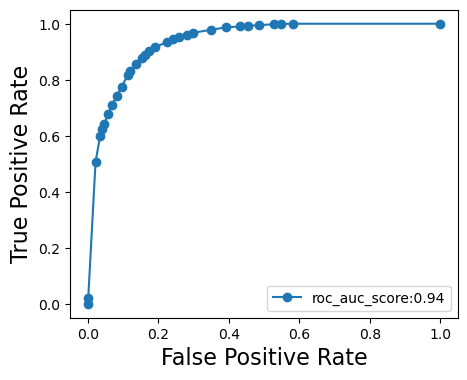

In [92]:
plt.plot(fpr,tpr,'o-',label="roc_auc_score:"+str(roc_score.round(2)))
plt.ylabel('True Positive Rate', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.legend()
plt.show()

We have a roc auc score of 0.9271661501145398. This means our model performance is outstanding in distinguishing between two classes Yes and No. This result is consistent with what we observe from classification report.

We print out the feature importance for our updated model:

In [93]:
filter = dt_clf.feature_importances_ > 0
dt_feature_names = list(X.columns)
dt_feature_names_nonzero = X_train.loc[:, filter].columns
features = pd.DataFrame([dt_clf.feature_importances_[dt_clf.feature_importances_ > 0]], columns=dt_feature_names_nonzero)
features

,age,drinks,drugs,smokes,no_of_kids,sex_f,sex_m,orientation_straight,religion_name_agnosticism,religion_name_atheism,religion_name_catholicism,religion_name_christianity,education_status_graduated,education_status_working,language_score
0,0.255543,0.001487,0.012261,0.027042,0.601895,0.011903,0.001666,0.008652,0.002672,0.054313,0.002336,0.008468,0.008875,0.00139,0.001498


#### Interpretation

In [94]:
features.sort_values(by=0, axis=1, ascending=False)

,no_of_kids,age,religion_name_atheism,smokes,drugs,sex_f,education_status_graduated,orientation_straight,religion_name_christianity,religion_name_agnosticism,religion_name_catholicism,sex_m,language_score,drinks,education_status_working
0,0.601895,0.255543,0.054313,0.027042,0.012261,0.011903,0.008875,0.008652,0.008468,0.002672,0.002336,0.001666,0.001498,0.001487,0.00139


We observe that in our updated model, we have number of kids as the feature with highest importance(0.576125) followed by age(0.278122), atheism(0.051985). Overall, we observe demographic attributes(age, number of kids, ethnicity, sex, sexual orientation), lifestyle choices(religion, drugs, drinks, smokes) as well as socioeconomic attributes(job, education status, language proficiency) contributing to our model.

The most significant feature is number of kids. This is consistent with our expectation as individuals are less likely to have childbearing intentions when they already have children.

Age is a significant feature because given the age bracket individuals' are in, what they are looking for on the dating platform differs. This is consistent with our hypothesis. We argue that younger and older users are not as likely to indicate childbearing intentions on dating platforms. Younger users tend to be seeking short-term, casual relationships while old users are more likely to have children already, hence indicating no childbearing intentions.

For religion, atheism, agnosticism, judaism, and other religions all contribute to our model. Religion tend to have significant impact on people's deicisions about childbearing. Similarly, education status of graduated or working rather than dropped out are among the important features. Jobs in education/academia and other jobs not specified are also significant for the model. We also observe sex and sexual orientation, drugs, drinks, smokes to have a non-zero feature importance. Language scores which by intuition is correlated with education level or cultural diversity also have non-zero importance.

Finally, we plot the decision tree classifier model's graph.

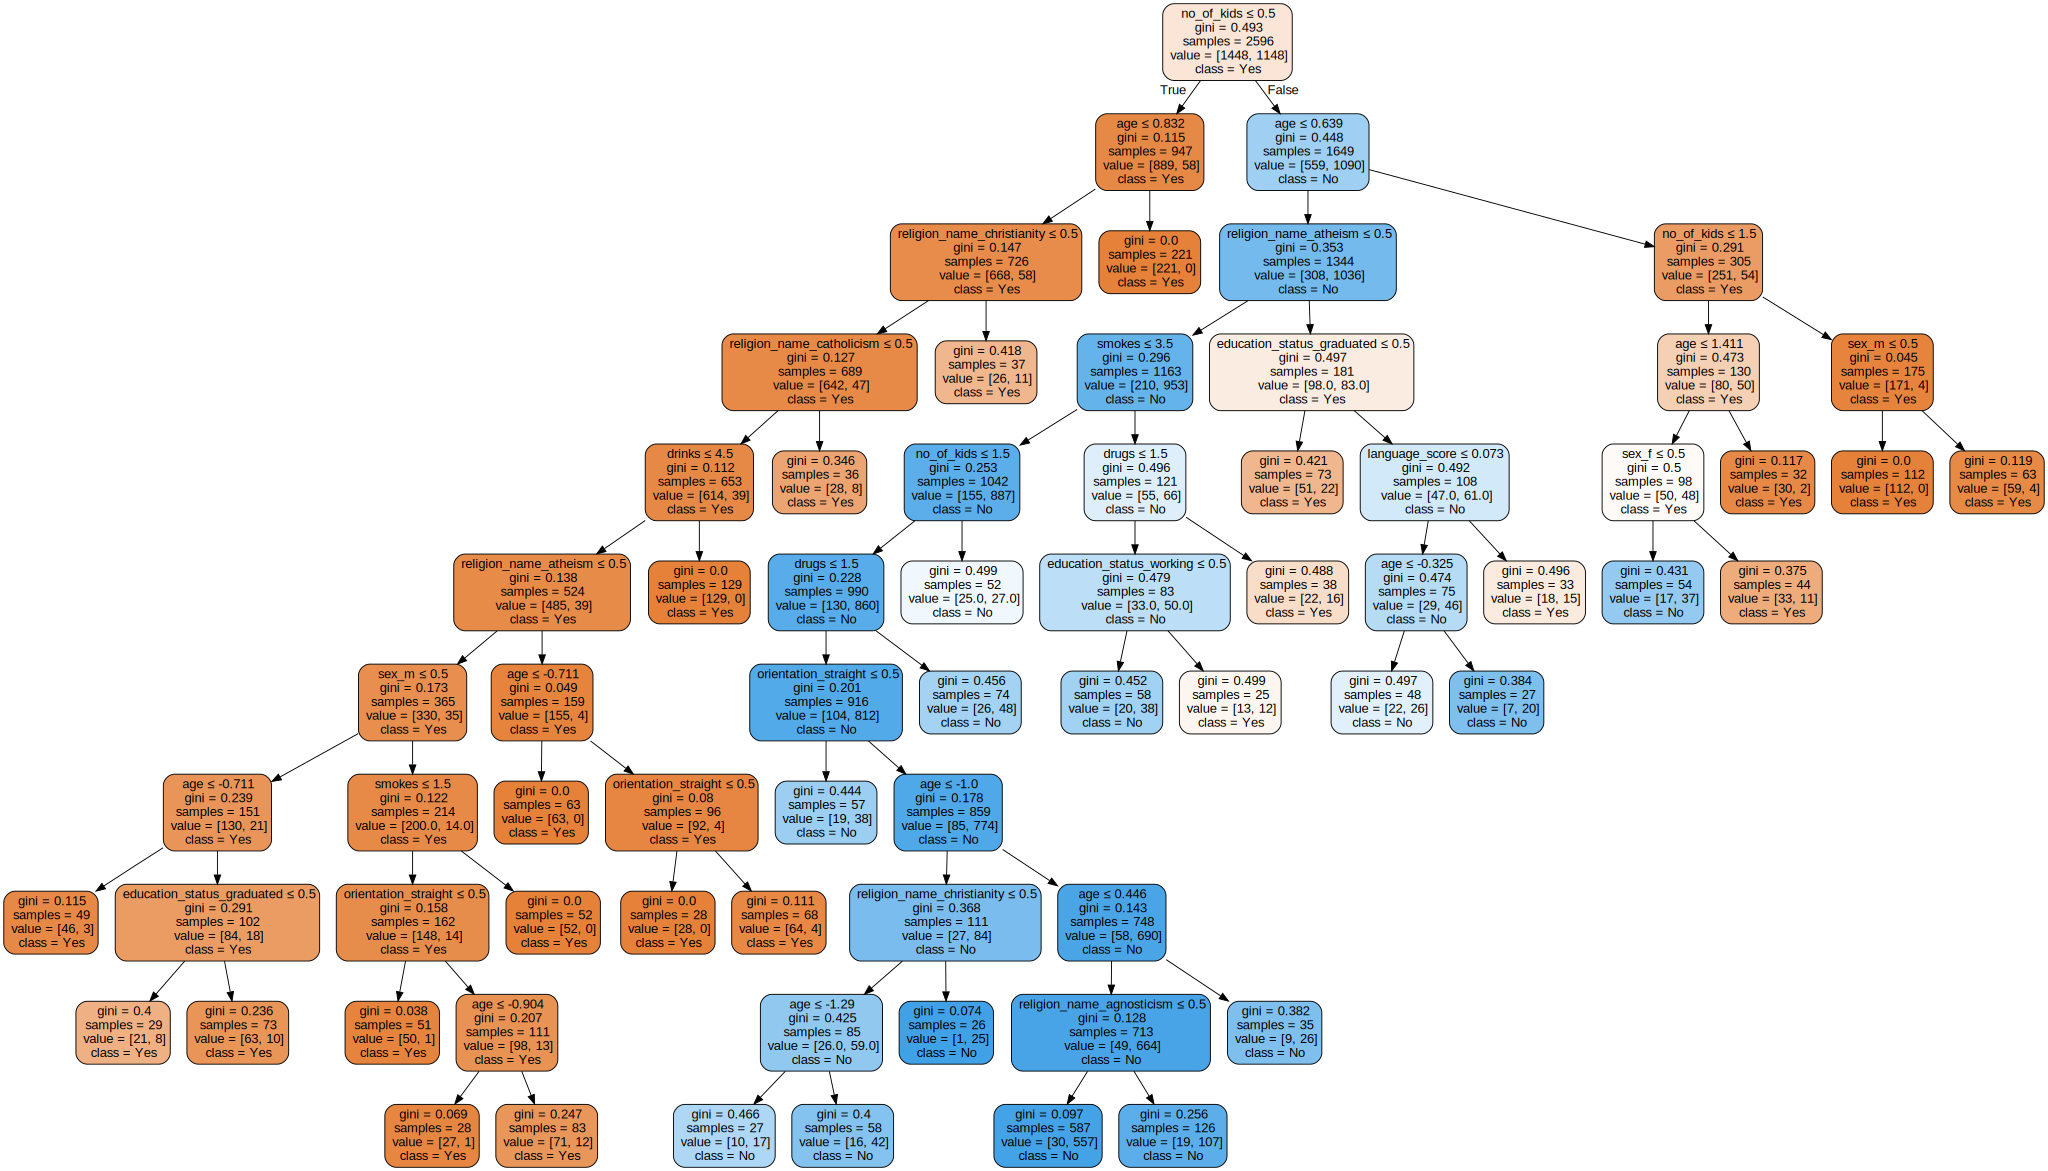

In [95]:
dot_data = tree.export_graphviz(dt_clf, out_file=None,
                                feature_names=dt_feature_names,
                                class_names=["Yes", "No"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

Overall, experimenting with different input features test for the importance of different groups of features and is consistent with our hypothesis that demographic and social-economic attributes are significant factors. However, we observe unexpected significance of lifestyle attributes in our model.

### Logistic Regression Multi-class Classifier


#### Basic Model

Following the logic of Decision Tree Classifier, we will train a basic model without triming the data. Different from DT, the target variable has to be numeric in logistic regression, so we will modify y first.

In [96]:
X = filtered_df.drop('want_more_kids', axis = 1)
y_raw = filtered_df['want_more_kids']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_raw)
dict(enumerate(label_encoder.classes_))

{0: 'No', 1: 'Yes'}

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We will use the default model first.

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels=[0, 1]))
print(classification_report(y_test, y_pred, digits=4, zero_division=np.nan))

[[1151  297]
 [ 262  886]]
              precision    recall  f1-score   support

           0     0.8146    0.7949    0.8046      1448
           1     0.7489    0.7718    0.7602      1148

    accuracy                         0.7847      2596
   macro avg     0.7818    0.7833    0.7824      2596
weighted avg     0.7856    0.7847    0.7850      2596



In [99]:
X = filtered_df.drop(['want_more_kids'] + sign_attr, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels=[0, 1]))
print(classification_report(y_test, y_pred, digits=4, zero_division=np.nan))

[[1157  291]
 [ 257  891]]
              precision    recall  f1-score   support

           0     0.8182    0.7990    0.8085      1448
           1     0.7538    0.7761    0.7648      1148

    accuracy                         0.7889      2596
   macro avg     0.7860    0.7876    0.7867      2596
weighted avg     0.7897    0.7889    0.7892      2596



In the DT model, we dropped sign attributes due to its weakness in explaining the model. In the logistic regression model, we will follow the logic.

Additionally, we assumed that some attributes with extremely skewed data might lower the performance of the model. By observing the dataset, we found that most language proficiency attributes are like this, so we dropped them to see if it helps.

In [100]:
X = filtered_df.drop(['want_more_kids'] + language , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels=[0, 1]))
print(classification_report(y_test, y_pred, digits=4, zero_division=np.nan))

[[1153  295]
 [ 258  890]]
              precision    recall  f1-score   support

           0     0.8172    0.7963    0.8066      1448
           1     0.7511    0.7753    0.7630      1148

    accuracy                         0.7870      2596
   macro avg     0.7841    0.7858    0.7848      2596
weighted avg     0.7879    0.7870    0.7873      2596



The performance just drops a bit in precision, recall, and f1-score, so we will drop the two groups of attributes in our folowing analysis.

In [101]:
filtered_df = filtered_df.drop(sign_attr + language, axis=1)

In [102]:
X = filtered_df.drop(['want_more_kids'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)

coe = clf.coef_.flatten()
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coe
})
sorted_features = feature_importance.sort_values(by='Coefficient', ascending=False)
top_20_class_1 = sorted_features.head(10)
bottom_20_class_0 = sorted_features.tail(10)
combined_features = pd.concat([top_20_class_1, bottom_20_class_0], axis=0).reset_index(drop=True)
combined_features

,Feature,Coefficient
0,language_score,1.945916
1,no_of_kids,0.807635
2,religion_name_islam,0.778775
3,status_single,0.778753
4,religion_name_catholicism,0.742667
5,education_type_ph.d program,0.729664
6,education_type_med school,0.647756
7,body_type_athletic,0.618809
8,orientation_straight,0.565799
9,diet_type_halal,0.544336


#### Experimenting with Different Input Features

For the logistic regression model, we will also test the effect of dropping different groups of attribute on the performance. From the above information, we have gained an initial understanding of that features might affect the model performance. Based on that, we will go further to test the group one by one.

***Lifestyle attributes***

In [103]:
col_ls = [col for cols in life_style_attr.values() for col in cols]
filtered_df_ls = filtered_df.drop(columns = col_ls)
X = filtered_df_ls.drop('want_more_kids', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [104]:
for k, v in life_style_attr.items():
    df_copy = filtered_df.copy()
    df_copy = filtered_df.drop(columns = v)
    X = df_copy.drop('want_more_kids', axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(confusion_matrix(y_test, y_pred,labels=[0, 1]))
    print(f'without attribute {k}, the score is \n{classification_report(y_test, y_pred, digits=4, zero_division=np.nan)}')

[[1153  295]
 [ 263  885]]
without attribute drinks, the score is 
              precision    recall  f1-score   support

           0     0.8143    0.7963    0.8052      1448
           1     0.7500    0.7709    0.7603      1148

    accuracy                         0.7851      2596
   macro avg     0.7821    0.7836    0.7827      2596
weighted avg     0.7858    0.7851    0.7853      2596

[[1152  296]
 [ 262  886]]
without attribute drugs, the score is 
              precision    recall  f1-score   support

           0     0.8147    0.7956    0.8050      1448
           1     0.7496    0.7718    0.7605      1148

    accuracy                         0.7851      2596
   macro avg     0.7821    0.7837    0.7828      2596
weighted avg     0.7859    0.7851    0.7853      2596

[[1148  300]
 [ 258  890]]
without attribute smokes, the score is 
              precision    recall  f1-score   support

           0     0.8165    0.7928    0.8045      1448
           1     0.7479    0.7753    

From the above result, we observe that for drugs and sign_seriousness, dropping them makes the precision, recall, and f-1score increase, which indicating potential noise in the data. Therefore, we will drop the two attributes.

***Physical attributes***

In [105]:
col_physical = [col for cols in physical_attr.values() for col in cols]
filtered_df_physical = filtered_df.drop(columns = col_physical)
X = filtered_df_physical.drop('want_more_kids', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [106]:
for k, v in physical_attr.items():
    df_copy = filtered_df.copy()
    df_copy = filtered_df.drop(columns = v)
    X = df_copy.drop('want_more_kids', axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'without attribute {k}, the score is \n{classification_report(y_test, y_pred, digits=4, zero_division=np.nan)}')

without attribute age, the score is 
              precision    recall  f1-score   support

           0     0.7561    0.7645    0.7603      1448
           1     0.6988    0.6890    0.6939      1148

    accuracy                         0.7311      2596
   macro avg     0.7275    0.7268    0.7271      2596
weighted avg     0.7308    0.7311    0.7309      2596

without attribute height, the score is 
              precision    recall  f1-score   support

           0     0.8143    0.7935    0.8038      1448
           1     0.7477    0.7718    0.7595      1148

    accuracy                         0.7839      2596
   macro avg     0.7810    0.7826    0.7817      2596
weighted avg     0.7848    0.7839    0.7842      2596

without attribute body_type, the score is 
              precision    recall  f1-score   support

           0     0.8164    0.7983    0.8073      1448
           1     0.7525    0.7735    0.7629      1148

    accuracy                         0.7874      2596
   macro

From this analysis, we can observe that age has a huge impact on the model performance because dropping it causes all the evaluation decrease. Hence it is very likely to be a decisive predictor. Meanwhile, the overall score of height doesen't change much when we dropped it, indicating that height might be an insignificant feature.

***Demographic attributes***

In [107]:
col_demo = [col for key, cols in demo_attr.items() if key != 'language' for col in cols]
filtered_df_demo = filtered_df.drop(columns = col_demo)
X = filtered_df_demo.drop('want_more_kids', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
for k, v in demo_attr.items():
    df_copy = filtered_df.copy()
    if v != language:
        df_copy = df_copy.drop(columns=v)
    X = df_copy.drop('want_more_kids', axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'without attribute {k}, the score is \n{classification_report(y_test, y_pred, digits=4, zero_division=np.nan)}')

without attribute sex, the score is 
              precision    recall  f1-score   support

           0     0.8160    0.7963    0.8060      1448
           1     0.7506    0.7735    0.7619      1148

    accuracy                         0.7862      2596
   macro avg     0.7833    0.7849    0.7840      2596
weighted avg     0.7871    0.7862    0.7865      2596

without attribute ethnicity, the score is 
              precision    recall  f1-score   support

           0     0.8199    0.7983    0.8090      1448
           1     0.7538    0.7787    0.7661      1148

    accuracy                         0.7897      2596
   macro avg     0.7868    0.7885    0.7875      2596
weighted avg     0.7906    0.7897    0.7900      2596

without attribute language_overall, the score is 
              precision    recall  f1-score   support

           0     0.8140    0.7949    0.8043      1448
           1     0.7487    0.7709    0.7597      1148

    accuracy                         0.7843      259

From the analysis above, we can conclude that religion and orientation might be significant predictors since dropping then worsened the model performance greatly. On the other hand, dropping language score rarely influenced the performance.

***Socioeconomic attributes***

In [109]:
col_socio = [col for cols in socioecno_attr.values() for col in cols]
filtered_df_socio = filtered_df.drop(columns = col_socio)
X = filtered_df_socio.drop('want_more_kids', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [110]:
for k, v in socioecno_attr.items():
    df_copy = filtered_df.copy()
    df_copy = filtered_df.drop(columns = v)
    X = df_copy.drop('want_more_kids', axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'without attribute {k}, the score is \n{classification_report(y_test, y_pred, digits=4, zero_division=np.nan)}')

without attribute economic, the score is 
              precision    recall  f1-score   support

           0     0.8152    0.7949    0.8049      1448
           1     0.7492    0.7726    0.7607      1148

    accuracy                         0.7851      2596
   macro avg     0.7822    0.7838    0.7828      2596
weighted avg     0.7860    0.7851    0.7854      2596

without attribute job, the score is 
              precision    recall  f1-score   support

           0     0.8107    0.7956    0.8031      1448
           1     0.7481    0.7657    0.7568      1148

    accuracy                         0.7824      2596
   macro avg     0.7794    0.7806    0.7799      2596
weighted avg     0.7830    0.7824    0.7826      2596

without attribute roman_status, the score is 
              precision    recall  f1-score   support

           0     0.8116    0.7942    0.8028      1448
           1     0.7472    0.7674    0.7572      1148

    accuracy                         0.7824      2596
   

The analysis shows that educational type and job are the two main factors which correlate with users' willingness to have children. Romantic status, c++ skill, and income are less important.

***Data Trimming***

Based on the previous analysis, we will drop the following columns: drinks, smokes, sign_seriousness, height, romantic status, c++ skill, income, and language score.

In [111]:
drop_attr = ['drugs', 'sign_seriousness', 'height', 'c++', 'income', 'language_score'] + \
    socioecno_attr['roman_status']

In [112]:
filtered_df = filtered_df.drop(drop_attr, axis=1)

In [113]:
X = filtered_df.drop(['want_more_kids'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels=[0, 1]))
print(classification_report(y_test, y_pred, digits=4, zero_division=np.nan))

[[1161  287]
 [ 267  881]]
              precision    recall  f1-score   support

           0     0.8130    0.8018    0.8074      1448
           1     0.7543    0.7674    0.7608      1148

    accuracy                         0.7866      2596
   macro avg     0.7837    0.7846    0.7841      2596
weighted avg     0.7870    0.7866    0.7868      2596



#### Parameter Tuning

***Justification of our tuning logic***

- Penalty
    - Although we have trimmed our dataset, it still contains many categorical features, and we assume that only a subset of them are important. Therefore, we begin with **L1 regularization**, as it inherently performs feature selection by shrinking some coefficients to zero. If L1 does not yield significant improvements, we will explore L2 regularization, which retains all features but penalizes large coefficients.

- C
    - We start with the **default C value** to identify which penalty (L1 or L2) works best. Then, we test a **range of C values (0.01, 0.1, 10)**.
    - If too many coefficients shrink to zero, we will increase C to reduce the regularization effect. Conversely, if the model overfits, we will decrease C for stronger regularization.

- Solver
    - Based on our coursework and previous exercises, we understand that solvers do not necessarily impact model performance in basic analyses. However, we still consider their computational efficiency and suitability for our dataset.
    - For L1 regularization, we use liblinear and saga, the only solvers that support it. We assume **saga** will perform better, as it efficiently handles medium to large datasets and works well with sparse data, whereas liblinear is more suited for small and dense datasets.
    - If L1 does not perform well, we will switch to L2 regularization and prioritize saga for the same reasons. Additionally, for L2, we will include newton-cg and lbfgs to compare their performance.

To implement our tuning strategy, we have written code to automate testing across different parameters.

In [114]:
penalties = ['l1', 'l2']
solvers = ['liblinear', 'saga', 'newton-cg', 'lbfgs']
C_values = [0.01, 0.1, 1, 10]

parameter_combinations = list(itertools.product(penalties, solvers, C_values))

results = []

for penalty, solver, C in parameter_combinations:
    if penalty == 'l1' and solver not in ['liblinear', 'saga']:
        continue

    try:
        clf = LogisticRegression(penalty=penalty, solver=solver, C=C, max_iter=10000, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        f1score = f1_score(y_test, y_pred, average='binary')

        results.append({
            'Penalty': penalty,
            'Solver': solver,
            'C': C,
            'f1-score': round(f1score, 4),
            })

    except Exception as e:
        results.append({
            'Penalty': penalty,
            'Solver': solver,
            'C': C,
            'Error': str(e)
        })

results_df = pd.DataFrame(results)
results_df

,Penalty,Solver,C,f1-score
0,l1,liblinear,0.01,0.7154
1,l1,liblinear,0.10,0.7607
2,l1,liblinear,1.00,0.7617
3,l1,liblinear,10.00,0.7617
4,l1,saga,0.01,0.7311
5,l1,saga,0.10,0.7570
6,l1,saga,1.00,0.7613
7,l1,saga,10.00,0.7617
8,l2,liblinear,0.01,0.7588
9,l2,liblinear,0.10,0.7610


The result aligns with our hypothesis. Having tried (l1, 1, saga) and (l2, 0.1, saga), we find the parameter for the best-performed model is **(l1, 1, saga)**.

The reason might be that l2 is not suitable for our model, and when we set C to a small number, all coefficients are largely shrinked, which leads to lower recall or precision despite a high F1-score for one class.

In [115]:
X = filtered_df.drop('want_more_kids', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = LogisticRegression(penalty="l1", C = 1, solver="saga", max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels=[0, 1]))
print(classification_report(y_test, y_pred, digits=4, zero_division=np.nan))

[[1161  287]
 [ 266  882]]
              precision    recall  f1-score   support

           0     0.8136    0.8018    0.8077      1448
           1     0.7545    0.7683    0.7613      1148

    accuracy                         0.7870      2596
   macro avg     0.7840    0.7850    0.7845      2596
weighted avg     0.7875    0.7870    0.7872      2596



The accuracy is 0.78, which is higher than the original model. However, accuracy alone is not always reliable even though our class distribution is relatively balanced. For the average score, it is 0.784 (0.7875), 0.785 (0.787), and 0.7845 (0.7872) for each. Based on the result, all the evaluation scores are higher than the original model.

In [116]:
X = filtered_df.drop('want_more_kids', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = LogisticRegression(penalty="l2", C = 0.01, solver="saga", max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels=[0, 1]))
print(classification_report(y_test, y_pred, digits=4, zero_division=np.nan))

[[1148  300]
 [ 271  877]]
              precision    recall  f1-score   support

           0     0.8090    0.7928    0.8008      1448
           1     0.7451    0.7639    0.7544      1148

    accuracy                         0.7800      2596
   macro avg     0.7771    0.7784    0.7776      2596
weighted avg     0.7808    0.7800    0.7803      2596



***auc curve***

In [117]:
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
roc_score = roc_auc_score(y_test, y_prob)
roc_score

0.862022830962327

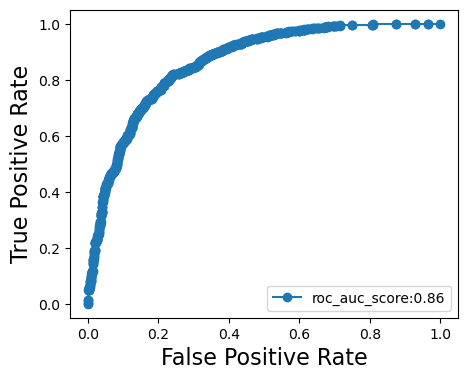

In [118]:
plt.plot(fpr,tpr,'o-',label="roc_auc_score:"+str(roc_score.round(2)))
plt.ylabel('True Positive Rate', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.legend()
plt.show()

We have a roc auc score of 0.8620240341116908. This means our model performance is excellent in distinguishing between two classes Yes and No.

#### Interpretation

In [119]:
coe = clf.coef_.flatten()
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coe
})
sorted_features = feature_importance.sort_values(by='Coefficient', ascending=False)
top_20_class_1 = sorted_features.head(10)
bottom_20_class_0 = sorted_features.tail(10)
combined_features = pd.concat([top_20_class_1, bottom_20_class_0], axis=0).reset_index(drop=True)
combined_features

,Feature,Coefficient
0,no_of_kids,0.606975
1,orientation_straight,0.513820
2,religion_name_catholicism,0.426586
3,body_type_athletic,0.355495
4,religion_name_christianity,0.299551
5,education_status_graduated,0.292289
6,diet_type_anything,0.290626
7,like_dogs_Yes,0.288661
8,education_type_masters program,0.257190
9,religion_name_judaism,0.218782


Based on our updated model, we identified the top 10 features that best predict users' willingness to have children and the top 10 features that best predict users' unwillingness to have children.

For those who want to have children, the strongest predictor is the number of children a user already has, which aligns with the results from the Decision Tree model. Previous research suggests that individuals who already have children are more likely to want additional children, particularly if they adhere to traditional family structures [1].

Higher education also plays an important role in predicting fertility intentions. Ph.D. holders (0.773) and Med school graduates (0.645) show a stronger willingness to have children, respectively. This finding contradicts traditional assumptions that higher education leads to lower fertility rates due to career prioritization. Instead, it aligns with studies suggesting that highly educated individuals often delay childbirth but ultimately plan for larger families once they achieve financial stability [2].

Religious identity is another key predictor. Catholicism (0.756), Islam (0.734), and Judaism (0.428) are positively associated with wanting children. Meanwhile, atheism (-1.426) and agnosticism (-0.727) have a negatively association. This supports previous research showing that religious individuals tend to have larger families, often due to cultural norms, religious teachings, and strong community support [3].

As in the DT model, age remains a significant predictor. The negative coefficient might suggest that older individuals are less likely to have children, but given our dataset, this should be interpreted cautiously. Our age attribute ranges from 18 to 60+, with a higher proportion of older users, which skews the model output. Thus, the negative coefficient does not necessarily imply a straightforward negative correlation between age and willingness to have children.

Additional insights come from lifestyle and economic attributes. Users with an athletic body type (0.668) are more likely to want children, while those identifying as “skinny” (-0.543) or “used up” (-1.105) are less inclined. This suggests a potential link between self-perceived physical health and fertility intentions, where individuals who feel physically fit may have greater confidence in managing parenthood [4]. Similarly, users who prefer not to disclose their occupation (-1.001) tend to have lower fertility intentions, possibly reflecting economic insecurity or a lack of long-term planning.

In conclusion, our model suggests that willingness to have children is shaped by a mix of personal, cultural, and economic factors. While existing parenthood, education, and religious identity strongly predict willingness to have children, age, secularism, and physical health perceptions tend to reduce childbearing intentions. However, to fully validate these findings, further real-life social research is needed.

[1] Liefbroer, A. C. (2009). Changes in family size intentions across young adulthood: A life-course perspective. European Journal of Population, 25(4), 363-386.

[2] Mueller, P. (2024). A PhD and Eight Kids? These Families Defy the Birth Rate Decline. The Daily Economy.

[3] McQuillan, K. (2004). When does religion influence fertility? Population and Development Review, 30(1), 25-56.

[4] Jokela, M., Elovainio, M., Kivimäki, M., & Keltikangas-Järvinen, L. (2009). Body weight, perceived weight, and fertility: A longitudinal analysis. Obesity, 17(2), 206-212.

# Error Analysis and Model Comparison

### Error Analysis

We first get incorrect predictions from both models:

In [120]:
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

In [121]:
clf.fit(X_train, y_train)
y_pred_lr = clf.predict(X_test)

In [122]:
dt_error_analysis = pd.DataFrame({
    'Actual': y_test,
    'DecisionTree_Pred': y_pred_dt,
    'Correct_DT': y_test == y_pred_dt
}, index=X_test.index)

In [123]:
dt_errors = dt_error_analysis[~dt_error_analysis['Correct_DT']]

In [124]:
lr_error_analysis = pd.DataFrame({
    'Actual': y_test,
    'LogisticRegression_Pred': y_pred_lr,
    'Correct_LR': y_test == y_pred_lr
}, index=X_test.index)

In [125]:
lr_errors = lr_error_analysis[~lr_error_analysis['Correct_LR']]

#### Shared Error Example

In [126]:
shared_errors_idx = dt_errors.index.intersection(lr_errors.index)
shared_errors = X_test.loc[shared_errors_idx].copy()
y_test_series = pd.Series(y_test, index=X_test.index)
shared_errors['Actual'] = y_test_series.loc[shared_errors_idx]
shared_errors['DecisionTree_Pred'] = dt_clf.predict(X_test.loc[shared_errors_idx])
shared_errors['LogisticRegression_Pred'] = clf.predict(X_test.loc[shared_errors_idx])

#### Error Unique to Decision Tree Model Examples

In [127]:
dt_unique_error_idx = dt_errors.index.difference(lr_errors.index)
dt_unique_errors = X_test.loc[dt_unique_error_idx].copy()
y_test_series = pd.Series(y_test, index=X_test.index)
dt_unique_errors["Actual"] = y_test_series.loc[dt_unique_error_idx]
dt_unique_errors["DecisionTree_Pred"] = dt_unique_error_idx.map(lambda idx: y_pred_dt[X_test.index.get_loc(idx)])

#### Error Unique to Logistic Regression Model Examples

In [128]:
lr_unique_error_idx = lr_errors.index.difference(dt_errors.index)
lr_unique_errors = X_test.loc[lr_unique_error_idx].copy()
y_test_series = pd.Series(y_test, index=X_test.index)
lr_unique_errors["Actual"] = y_test_series.loc[lr_unique_error_idx]
lr_unique_errors["LogisticRegression_Pred"] = y_pred_lr[X_test.index.get_indexer(lr_unique_error_idx)]

### Model Comparison

In [129]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("\nShared Errors (Misclassified by Both Models):")
print(shared_errors.head(2))

print("\nDecision Tree Unique Errors:")
print(dt_unique_errors.head(1))

print("\nLogistic Regression Unique Errors:")
print(lr_unique_errors.head(1))


Shared Errors (Misclassified by Both Models):
           age  drinks  smokes  is_asian  is_white  is_black  is_other  \
5579 -0.276997     4.0     4.0         0         1         0         0   
8475  1.459179     4.0     1.0         0         0         1         0   

      is_hispanic-/-latin  is_pacific-islander  is_native-american  \
5579                    0                    0                   0   
8475                    0                    0                   0   

      is_middle-eastern  is_indian  no_of_kids  religion_seriousness  \
5579                  0          0         0.0                   2.0   
8475                  0          0         1.0                   2.0   

      diet_seriousness  sex_f  sex_m  orientation_bisexual  orientation_gay  \
5579               2.0      1      0                     0                0   
8475               1.0      0      1                     0                0   

      orientation_straight  body_type_Not_mentiond  body_type_a 

From the result, we got:


Shared Errors (Misclassified by Both Models):
* The two cases 5579 and 8475 were incorrectly predicted as 0 (No childbearing intention) by both the Decision Tree and Logistic Regression models, but their actual values were 1 (Yes, they do want more children).

Age:
* Case 5579: Standardized age is -0.276997 (likely middle-aged).
* Case 8475: Standardized age is 1.459179 (likely older).
This suggests both younger and older individuals can be misclassified.

---

Unique Errors - Decision Tree: The case 37 was misclassified by the Decision Tree model but not Logistic Regression.
*   Age is 0.012366 (close to average).
*   Drug Use = 1.0 → Drug use might have influenced the Decision Tree more.
*   Hispanic/Latino background → This ethnicity might have played a role in how the Decision Tree partitions the data.
*   Graduated but not working → The Decision Tree might have misinterpreted the employment status as a key indicator.
*   Language score is 0.04 → Consistent with misclassified cases, possibly a trend.

---

Unique Errors - Logistic Regression: The case 8 was misclassified by Logistic Regression but not Decision Tree.
*   Age is 0.398183 (slightly above average).
*   Drug Use = 1.0.
*   Ethnicity: Not White, Black, Asian, or Hispanic (possibly a minority group).
*   Graduated but not working.
*   Low language score (0.04).


#### Explanation

Our exploration of the two models demonstrates that the decision tree model consistently outperforms the logistic regression model. We attribute this difference in performance primarily to the composition of our features and the nature of relationship we intend to explore and model.

The majority of the features in our dataset—both in the basic and updated models—are categorical. Specifically, we have only two continuous features (age and height) compared to over 190 categorical features after encoding.

This imbalance between continuous and discrete variables plays a crucial role in model performance. Logistic regression, being a regression-based approach, tends to perform better when the input variables are predominantly continuous. In contrast, decision trees are inherently well-suited for handling categorical variables, as they partition the data based on feature values rather than assuming a linear relationship.

In addition, decision tree models perform better in modelling complex and non-linear relationships than logistic regression models in general. Hence, we argue that the relationship we attempt to explore between the demographic, lifestyle, socioeconomic attributes, and expression of childbearing intentions is a non-linear one.

Given this, the decision tree model consistently outperforms logistic regression in our dataset, reinforcing the importance of feature composition when selecting an appropriate modeling approach.